In [1]:

import tensorflow as tf
import os
import numpy as np
import random
import cv2 as cv




import matplotlib.pyplot as plt

##from skimage.io import imread,imshow

# model = tf.keras.models.load_model('Modelv1',compile=False)

# data = np.load('data.npz')
# X_train = data['X_train']
# X_test = data['X_test']
# Y_test = data['Y_test']

# preds_test = model.predict(X_test)
#preds_test = (preds_test > 0.5).astype(np.uint8)












2023-05-06 21:46:00.896381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
preds_test = (preds_test > 0.5).astype(np.uint8)
1 in preds_test[0]

NameError: name 'preds_test' is not defined

In [ ]:
ix = random.randint(0, len(X_test))
img = cv.cvtColor(X_test[1],cv.COLOR_BGR2GRAY)
img2=np.array(preds_test[1]).astype('uint8')

# img2 = img2.transpose(2,0,1).reshape(128,-1)


for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        if img2[i][j] == 1:
            img2[i][j] = 255


cv.imshow('X',img)
cv.waitKey(0)
# cv.imshow('Y',np.array(Y_test[ix]).astype('uint8'))
cv.imshow('Pred',img2)





cv.waitKey(0)
cv.destroyAllWindows()



NameError: name 'X_test' is not defined

In [8]:
img3 = cv.imread('/home/omkar/FireClassifier/segmented_imgs/img/img75/Fire2.jpg')
# img3 = cv.imread('/home/omkar/FireClassifier/Flame/Flame0.jpg')
img4 = img3[:,:,2]
img5 = cv.blur(img4,(10,10))
contours, hierarchy = cv.findContours(img4,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
contours2, hierarchy = cv.findContours(img5,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contours),len(contours2))

194 2


In [9]:
c1 = contours2
# c = list(c[5])
# c_sort_by_y = sorted(c,key = lambda x : x[0][1])
# c_sort_by_x = sorted(c,key = lambda x : x[0][0])
# c_sort_by_y
c_selected = c1[0]
for i in c1:
    if len(c_selected)< len(i): 
        c_selected = i

c = list(c_selected)
c_sort_by_y = sorted(c,key = lambda x : x[0][1])
c_sort_by_x = sorted(c,key = lambda x : x[0][0])
print(cv.contourArea(c_selected),len(c_selected))

159750.0 1006


In [28]:

import math

fire_img1=cv.imread('/home/omkar/FireClassifier/segmented_imgs/img/img75/Fire2.jpg')
fire_img2=cv.imread('/home/omkar/FireClassifier/segmented_imgs/img/img75/Fire19.jpg')
flame_img1=cv.imread('/home/omkar/FireClassifier/segmented_imgs/img/Fire/Flame11.jpg')
flame_img2=cv.imread('/home/omkar/FireClassifier/segmented_imgs/img/Fire/Flame1.jpg')

def contourprep(img):
    img = img[:,:,2]
    img = cv.blur(img,(10,10))
    contours, hierarchy = cv.findContours(img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    c_selected = contours[0]
    for i in contours:
        if len(c_selected)< len(i): 
            c_selected = i

    c = list(c_selected)
    c_sort_by_y = sorted(c,key = lambda x : x[0][1])
    c_sort_by_x = sorted(c,key = lambda x : x[0][0])
    return contours,c_sort_by_x,c_sort_by_y
    
    

    
def getBaseWidthAndHeight(arr:list):
    min_y = arr[len(arr)-1][0][1]
    max_y = arr[0][0][1]
    range = (min_y - max_y)/4
    min_x = arr[len(arr)-1][0][0]
    max_x = arr[len(arr)-1][0][0]
    #print('hehe',max_x,min_x,range,max_y,min_y,min_y-range)

    
    i = len(arr)-1
    while i >= 0:
        if(arr[i][0][1] < int(min_y-range)):
            break
        if(arr[i][0][0] > max_x):
            max_x = arr[i][0][0]
        if(arr[i][0][0] < min_x):
            min_x = arr[i][0][0]
        i = i -1
    midpoint = math.floor((min_x + max_x)/2)

    return {"width":max_x - min_x,"height":min_y-max_y,"base_midpoint":midpoint}



def getSymmetryScore(arr:list,base_midpoint):
    

    min_x = arr[len(arr)-1][0][0]
    max_x = arr[0][0][0]
    mean = base_midpoint
    left_area = 0
    right_area = 0

    for i in range(0,len(arr)):
        if arr[i][0][0] < mean:
            left_area += mean-arr[i][0][0]
        else:
            right_area += arr[i][0][0]-mean
    return abs(left_area-right_area)/(left_area+right_area)

def getAttrributes(img):
    h_mat = img[:,:,0]
    s_mat = img[:,:,1]
    v_mat = img[:,:,2]
    number_of_nonblackpixels = np.count_nonzero(v_mat)
    average_h = h_mat[np.nonzero(h_mat)].mean()
    average_s = s_mat[np.nonzero(s_mat)].mean()
    average_v = v_mat[np.nonzero(v_mat)].mean()
    return number_of_nonblackpixels,average_h,average_s,average_v

def getArclengthAreaRatio(img):
    number_of_nonblackpixels = np.count_nonzero(img[:,:,2])
    contours, hierarchy = cv.findContours(img[:,:,2],cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    total_arclength = 0
    for i in contours:
        total_arclength += cv.arcLength(i,True)

    return total_arclength

def whitePixelsAreaRatio(img):
    
    number_of_nonblackpixels = np.count_nonzero(img[:,:,2])
    return len(np.where(img[:,:,2]>250))/number_of_nonblackpixels

# countours,c_sort_by_x,c_sort_by_y=contourprep(img3)





# countours,c_sort_by_x,c_sort_by_y=contourprep(cv_image)
#basewidth_Height_base_midpoint = getBaseWidthAndHeight(c_sort_by_y)
#print(basewidth_Height_base_midpoint,getSymmetryScore(c_sort_by_x,basewidth_Height_base_midpoint["base_midpoint"]))
print('Fireimg1',getArclengthAreaRatio(fire_img1))
print('Flameimg1',getArclengthAreaRatio(flame_img1))
print('Fireimg2',getArclengthAreaRatio(fire_img2))
print('Flameimg2',getArclengthAreaRatio(flame_img2))

#basewidth_Height_base_midpoint = getBaseWidthAndHeight(c_sort_by_y)
#print(fire,getSymmetryScore(c_sort_by_x,fire["base_midpoint"]))
#print('\n')
#print(getArclengthAreaRatio(img3))
#print('\n')

#getSymmetryScore(c_sort_by_x,fire["base_midpoint"])
# img3 = img3.astype(np.uint8)
# img3 = cv.drawContours(img3, c, -1, (0,255,0), 3)



Fireimg1 8442.307565569878
Flameimg1 2208.2022211551666
Fireimg2 22235.900946497917
Flameimg2 7982.573382258415


In [ ]:
print(np.count_nonzero(img3),img3.shape[0]*img3.shape[1])


443341 518400


In [11]:
cv.imshow('Pred',img4)





cv.waitKey(0)
cv.destroyAllWindows()

In [60]:
import re
import os
import numpy as np
import cv2 as cv

import math
folder='/home/omkar/Downloads/Flame_cropped_masked'
images=[]

i=0





def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

def contourprep(img):
    img = img[:,:,2]
    img = cv.blur(img,(10,10))
    contours, hierarchy = cv.findContours(img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    c_selected = contours[0]
    for i in contours:
        if len(c_selected)< len(i): 
            c_selected = i

    c = list(c_selected)
    c_sort_by_y = sorted(c,key = lambda x : x[0][1])
    c_sort_by_x = sorted(c,key = lambda x : x[0][0])
    return contours,c_sort_by_x,c_sort_by_y
    
    

    
def getBaseWidthAndHeight(arr:list):
    min_y = arr[len(arr)-1][0][1]
    max_y = arr[0][0][1]
    range = (min_y - max_y)/4
    min_x = arr[len(arr)-1][0][0]
    max_x = arr[len(arr)-1][0][0]
    #print('hehe',max_x,min_x,range,max_y,min_y,min_y-range)

    
    i = len(arr)-1
    while i >= 0:
        if(arr[i][0][1] < int(min_y-range)):
            break
        if(arr[i][0][0] > max_x):
            max_x = arr[i][0][0]
        if(arr[i][0][0] < min_x):
            min_x = arr[i][0][0]
        i = i -1
    midpoint = math.floor((min_x + max_x)/2)

    return {"width":max_x - min_x,"height":min_y-max_y,"base_midpoint":midpoint}



def getSymmetryScore(arr:list,base_midpoint):
    

    min_x = arr[len(arr)-1][0][0]
    max_x = arr[0][0][0]
    mean = base_midpoint
    left_area = 0
    right_area = 0

    for i in range(0,len(arr)):
        if arr[i][0][0] < mean:
            left_area += mean-arr[i][0][0]
        else:
            right_area += arr[i][0][0]-mean
    return abs(left_area-right_area)/(left_area+right_area)

def getAttrributes(img):
    h_mat = img[:,:,0]
    s_mat = img[:,:,1]
    v_mat = img[:,:,2]
    number_of_nonblackpixels = np.count_nonzero(v_mat)
    average_h = h_mat[np.nonzero(h_mat)].mean()
    average_s = s_mat[np.nonzero(s_mat)].mean()
    average_v = v_mat[np.nonzero(v_mat)].mean()
    return number_of_nonblackpixels,average_h,average_s,average_v

def getArclength(img):
    number_of_nonblackpixels = np.count_nonzero(img[:,:,2])
    contours, hierarchy = cv.findContours(img[:,:,2],cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    total_arclength = 0
    for i in contours:
        total_arclength += cv.arcLength(i,True)

    return total_arclength

def whitePixelsAreaRatio(img):
    
    number_of_nonblackpixels = np.count_nonzero(img[:,:,2])
    return len(np.where(img[:,:,2]>250))/number_of_nonblackpixels




non_masked_images = os.listdir(folder)
non_masked_images = sorted_alphanumeric(non_masked_images)
list1 = []
for img in non_masked_images:
        
        cv_image = cv.imread(folder+"/"+img)
        if cv_image is not None:
            # countours,c_sort_by_x,c_sort_by_y=contourprep(cv_image)
            # basewidth_Height_base_midpoint = getBaseWidthAndHeight(c_sort_by_y)
            # print(basewidth_Height_base_midpoint,getSymmetryScore(c_sort_by_x,basewidth_Height_base_midpoint["base_midpoint"]))

            list1.append(getArclength(cv_image))

                
            #cv.imwrite(filename1+"Flame" + str(i)+ ".jpg", output)
            i=i+1

Flame = np.array(list1)
np.savez('Flame',Flame)


In [11]:
flame = np.load('Flame.npz')['arr_0']
fire = np.load('Fire.npz')['arr_0']

In [11]:
print(flame.mean(),flame.max(),np.median(flame),np.percentile(flame,80))

9157.584981900527 37266.49344575405 7280.179379284382 14150.051286315918


In [19]:
print(fire.mean(),fire.max(),np.median(fire),np.percentile(fire,10))

17875.792288437584 63421.62496137619 16679.080199956894 8198.902270674706


In [24]:
#if predicting fire is 1

TN = np.sum(flame < 8200)
TP = np.sum(fire > 8200)

FP = np.sum(flame > 8200)
FN = np.sum(fire < 8200)

print('Precision',(TP/(TP+FP)))
print('Recall',(TP/(TP+FN)))
print('Accuracy',((TP+TN)/(TP+TN+FP+FN)))

Precision 0.758659217877095
Recall 0.8993377483443709
Accuracy 0.7639450282942603


In [21]:
#if predicting flame is 1
f1_score = 0

    

TP = np.sum(flame < 11307)
TN = np.sum(fire > 11307)

FN = np.sum(flame > 11307)
FP = np.sum(fire < 11307)
P=(TP/(TP+FP))
R=(TP/(TP+FN))
f1 = (2*(P*R))/(P+R)



print('Precision',(TP/(TP+FP)))
print('Recall',(TP/(TP+FN)))
print('Accuracy',((TP+TN)/(TP+TN+FP+FN)))
print('F1',f1)

Precision 0.6733466933867736
Recall 0.6970954356846473
Accuracy 0.7502021018593371
F1 0.6850152905198776


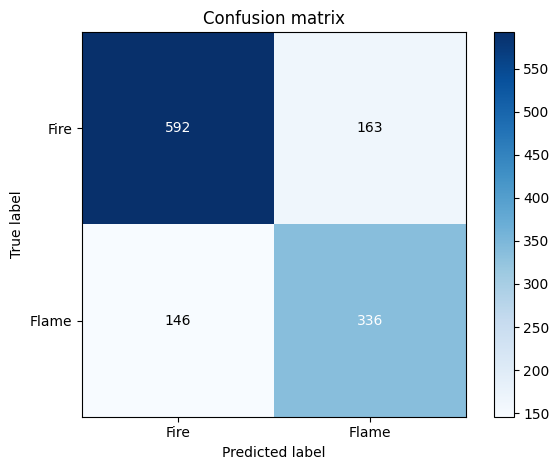

Precision 0.6733466933867736
Recall 0.6970954356846473
Accuracy 0.7502021018593371
F1 0.6850152905198776
[[592 163]
 [146 336]]


In [23]:
cm = np.array([[TN, FP], [FN, TP]])

# Define class labels
class_names = ['Fire', 'Flame']

# Plot confusion matrix as heatmap
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Add labels to heatmap cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()
print('Precision',(TP/(TP+FP)))
print('Recall',(TP/(TP+FN)))
print('Accuracy',((TP+TN)/(TP+TN+FP+FN)))
print('F1',f1)
print(cm)

In [9]:
print('asf')

asf


In [17]:
f1_score = -1
for i in range(8500,12000):
    
    

    TP = np.sum(flame < i)
    TN = np.sum(fire > i)

    FN = np.sum(flame > i)
    FP = np.sum(fire < i)
    P=(TP/(TP+FP))
    R=(TP/(TP+FN))
    f1 = (P*R)/(P+R)
    if f1_score <f1:
        f1_score = f1
        print(i)

8500
8543
8547
8584
8595
8631
8640
8642
8646
8686
8701
8740
8767
8769
8796
8821
9166
9375
9402
9440
9443
9479
9594
9683
9693
9700
9782
9786
9834
9898
11267
11307
